In [1]:
import numpy as np
from utils.QAgent import *
from utils.localizationNet import *
import matplotlib.pyplot as py
from utils.Utils import generate_square as GS

In [2]:
sampling_grid=generate_sampling_grid()

Consider a square

In [3]:
square=GS(14,2) 


Transpose the square

In [4]:
identity= np.array([[1,0,0],[0,1,0],[0,0,1]]) 
affine1=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
affine2=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
mod=identity+affine1
resultant_affine=np.dot ((affine1+identity),(affine2+identity)) 
print(resultant_affine)


[[1. 0. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]


In [5]:
affines =[]
affines.append(affine1)
affines.append(affine2) 

In [6]:
manipulation3 = affine_transformation(square,resultant_affine,sampling_grid)
#py.imshow(manipulation3.reshape(28,28))
target=manipulation3 #This will be our target. 


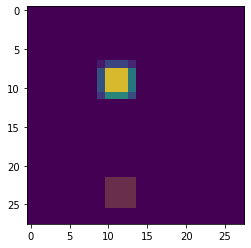

In [7]:
py.imshow(target.reshape(28,28))
py.imshow(square.reshape(28,28),alpha=0.2)

### Steps  
1) Load up Q values for a given state,

2) Randomize a value, 
    a)if the value is <$\epsilon$ take the action max (Q(state)) 
    b)if the value is >$\epsilon$ take a random action 

3) If state does not exist, add new state. Check MSE in that state, update Q(state) with = Q(state) + sum (reward for Q(state')) AND reduce $\epsilon$ by $\delta \epsilon $ IF MSE has reduced. Else do nothing. 

4) Repeat step 2


### STEP1: Load up Q values and add most current state

In [8]:
agent = Q_agent_base() 